In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import itertools
import seaborn as sns
sns.set()

In [29]:
p_info = pd.read_csv('pre_participants.csv')

In [30]:
summary = pd.DataFrame()
for pid in p_info['pid']:
    data = pd.read_csv('result/' + pid + '_MItask.csv', index_col=0)
    summary = summary.append(data)

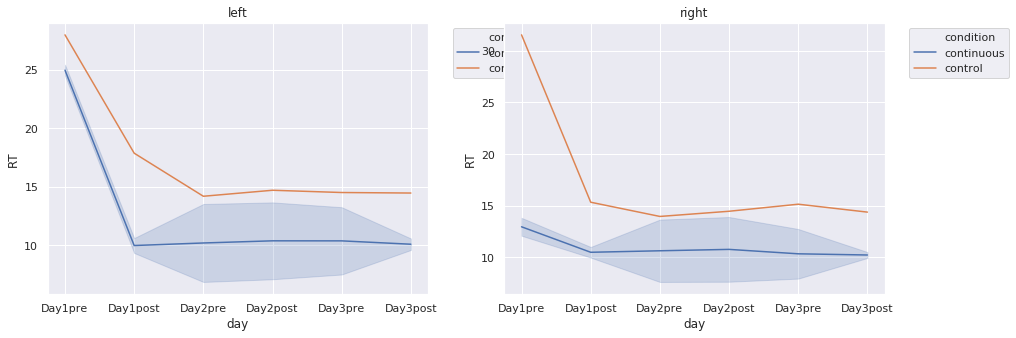

In [31]:
data = summary.groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).mean()
data['day'] = data['day'] + data['timing']
plt.figure(figsize=(15, 5))
for i, hand in enumerate(['left', 'right']):
    plt.subplot(1, 2, i+1)
    sns.lineplot(x='day', y='RT', hue='condition', ci='sd', sort=None, data=data[data.hand == hand])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title(hand)

In [32]:
data

,pid,condition,day,timing,hand,block,RT
0,tani,continuous,Day1pre,pre,left,2,25.291252
1,tani,continuous,Day1pre,pre,right,2,13.560239
2,tani,continuous,Day1post,post,right,2,10.116186
3,tani,continuous,Day1post,post,left,2,9.497901
4,tani,continuous,Day2pre,pre,right,2,12.759537
5,tani,continuous,Day2pre,pre,left,2,12.525301
6,tani,continuous,Day2post,post,left,2,12.676948
7,tani,continuous,Day2post,post,right,2,12.975156
8,tani,continuous,Day3pre,pre,right,2,12.029786
9,tani,continuous,Day3pre,pre,left,2,12.384218


In [33]:
PTsummary = pd.DataFrame()
for pid in p_info['pid']:
    PT_data = pd.read_csv('result/' + pid + '_PT.csv', index_col=0)
    PTsummary = PTsummary.append(PT_data)

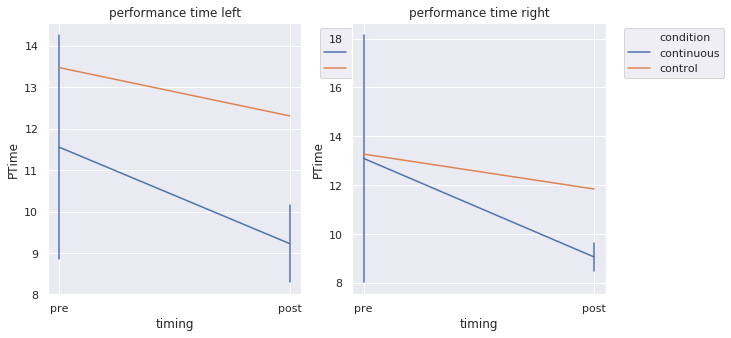

In [34]:
plt.figure(figsize=(10,5))
data = PTsummary.groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).median()
for i, hand in enumerate(['left', 'right']):
    plt.subplot(1, 2, i+1)
    sns.lineplot(x='timing', y='PTime', hue='condition', sort=False, err_style='bars', data=data[data.hand == hand])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title('performance time ' + hand)

In [35]:
PTsummary.groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).median()

,pid,condition,timing,hand,trial,PTime
0,tani,continuous,pre,right,0,18.155197
1,tani,continuous,pre,left,0,14.263131
2,tani,continuous,post,right,1,9.639115
3,tani,continuous,post,left,1,10.148305
4,Yu,continuous,pre,right,1,8.032142
5,Yu,continuous,pre,left,1,8.842518
6,Yu,continuous,post,right,1,8.468391
7,Yu,continuous,post,left,1,8.300608
8,Okubo,control,pre,right,1,13.270542
9,Okubo,control,pre,left,1,13.472461


In [36]:
MC_df = summary[(summary.day == 'Day1') & (summary.timing == 'pre') & (summary.hand == 'left')].groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).median()
MC_df['PT'] = PTsummary[(PTsummary.timing == 'pre') & (PTsummary.hand == 'left')].groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).mean()['PTime']

In [37]:
data = summary[(summary.day == 'Day1') & (summary.timing == 'pre') & (summary.hand == 'right')].groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).median()
data['PT'] = PTsummary[(PTsummary.timing == 'pre') & (PTsummary.hand == 'right')].groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).mean()['PTime']
MC_df = MC_df.append(data)

In [38]:
data = summary[(summary.day == 'Day3') & (summary.timing == 'post') & (summary.hand == 'left')].groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).median()
data['PT'] = PTsummary[(PTsummary.timing == 'post') & (PTsummary.hand == 'left')].groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).mean()['PTime']
MC_df = MC_df.append(data)

In [39]:
data = summary[(summary.day == 'Day3') & (summary.timing == 'post') & (summary.hand == 'right')].groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).median()
data['PT'] = PTsummary[(PTsummary.timing == 'post') & (PTsummary.hand == 'right')].groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).mean()['PTime']
MC_df = MC_df.append(data)

In [40]:
MC_df['MC'] = abs(MC_df['RT'] - MC_df['PT'])

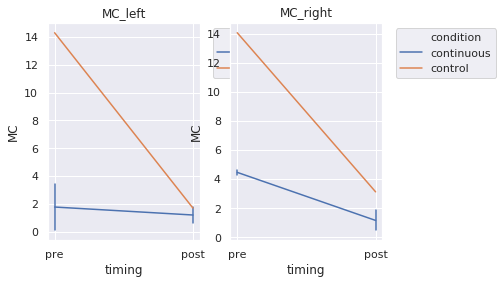

In [41]:
for i, hand in enumerate(['left', 'right']):
    plt.subplot(1, 2, i+1)
    sns.lineplot(x='timing', y='MC', hue='condition', sort=False, err_style='bars', data=MC_df[MC_df.hand == hand])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title('MC_' + hand)